## Data Science:: Healthcare - Persistency of a drug:: Group Project

### Problem Statement:
One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.
### ML Problem:
With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.
#### Target Variable: Persistency_Flag
### Task:
• Problem understanding  
• Data Understanding  
• Data Cleaning and Feature engineering  
• Model Development  
• Model Selection  
• Model Evaluation  
• Report the accuracy, precision and recall of both the class of target variable  
• Report ROC-AUC as well  
• Deploy the model  
• Explain the challenges and model selection   

### Feature Description:
##### Bucket	
    • Variable	Variable Description  
##### Unique Row 
    • Id	Patient ID	Unique ID of each patient  
##### Target Variable	
    • Persistency_Flag	Flag indicating if a patient was persistent or not  
##### Demographics	
    • Age	Age of the patient during their therapy  
	• Race	Race of the patient from the patient table  
	• Region	Region of the patient from the patient table  
	• Ethnicity	Ethnicity of the patient from the patient table  
	• Gender	Gender of the patient from the patient table  
	• IDN Indicator	Flag indicating patients mapped to IDN  
##### Provider Attributes	
    • NTM - Physician Specialty	Specialty of the HCP that prescribed the NTM Rx  
##### Clinical Factors	  
    • NTM - T-Score 	T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)  
	• Change in T Score 	Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)  
	• NTM - Risk Segment	Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)  
	• Change in Risk Segment	Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)  
	• NTM - Multiple Risk Factors	Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)  
	• NTM - Dexa Scan Frequency	Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)  
	• NTM - Dexa Scan Recency	Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)  
	• Dexa During Therapy	Flag indicating if the patient had a Dexa Scan during their first continuous therapy  
	• NTM - Fragility Fracture Recency	Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)  
	• Fragility Fracture During Therapy	Flag indicating if the patient had fragility fracture  during their first continuous therapy  
	• NTM - Glucocorticoid Recency	Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx  
	• Glucocorticoid Usage During Therapy	Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy  
##### Disease/Treatment Factor  	
    • NTM - Injectable Experience	Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx    
	• NTM - Risk Factors	Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx   
	• NTM - Comorbidity 	Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied  
	• NTM - Concomitancy	Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)  
	• Adherence	Adherence for the therapies  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis & Modeling

1) Data Preparation  
2) Data Exploration  
3) Exploratory Data Analysis  
4) Data Processing & Wrangling  
5) Feature Engineering  
6) Feature Scaling  
7) Modeling  
8) Model Evaluation  
9) Deployment  

### 1) Data Preparation
    1-1) Data shape  
    1-2) Data type  
    1-3) Missing Values  

In [2]:
# Load Data
data = pd.ExcelFile('Healthcare_dataset.xlsx')
df = pd.read_excel(data, 'Dataset')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [3]:
# Data shape, type
print('Data shape: ', df.shape)
print('Data type: ', df.info())

Data shape:  (3424, 69)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   

In [4]:
# Categorical Columns
df_cat = df.select_dtypes('object')
print('Categorical columns: ', np.array(df_cat.columns))
print('Number of categorical columns: ', df_cat.shape[1])

Categorical columns:  ['Ptid' 'Persistency_Flag' 'Gender' 'Race' 'Ethnicity' 'Region'
 'Age_Bucket' 'Ntm_Speciality' 'Ntm_Specialist_Flag'
 'Ntm_Speciality_Bucket' 'Gluco_Record_Prior_Ntm' 'Gluco_Record_During_Rx'
 'Dexa_During_Rx' 'Frag_Frac_Prior_Ntm' 'Frag_Frac_During_Rx'
 'Risk_Segment_Prior_Ntm' 'Tscore_Bucket_Prior_Ntm'
 'Risk_Segment_During_Rx' 'Tscore_Bucket_During_Rx' 'Change_T_Score'
 'Change_Risk_Segment' 'Adherent_Flag' 'Idn_Indicator'
 'Injectable_Experience_During_Rx'
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'
 'Comorb_Encounter_For_Immunization'
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx'
 'Comorb_Vitamin_D_Deficiency'
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'
 'Comorb_Long_Term_Current_Drug_Therapy' 'Comorb_Dorsalgia'
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions'
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure'
 'Comorb_Disorders

In [5]:
# Numerical Columns
df_num = df.select_dtypes('number')
print('Numerical columns: ', np.array(df_num.columns))
print('Number of numerical columns: ', df_num.shape[1])

Numerical columns:  ['Dexa_Freq_During_Rx' 'Count_Of_Risks']
Number of numerical columns:  2


In [6]:
# Missing Values
print(f'There are {df.isnull().sum().sum()} missing values')

# Duplicate Records
print(f"There are {df.duplicated().sum()} duplicated records.")

There are 0 missing values
There are 0 duplicated records.


### 2) Data Exploration

In [7]:
# Understand Numeric data. describe()
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


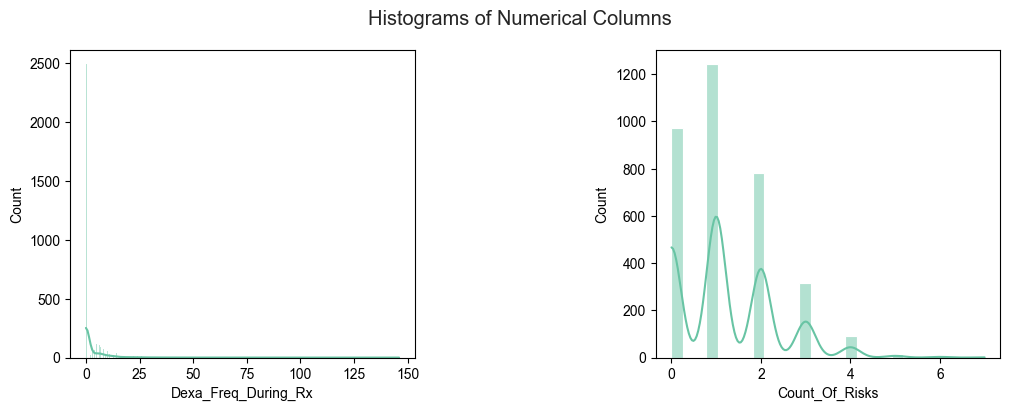

In [8]:
# Histogram of Numerical Columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.7, hspace=0.3)
sns.set(style="darkgrid")
for i, ax in enumerate(axes.ravel()):
    if i > 2:
        ax.set_visible(False)
        continue
    sns.histplot(data=df, x=df_num.columns[i],ax = ax, kde=True, color = '#68c4a4')
fig.suptitle('Histograms of Numerical Columns')
plt.show()

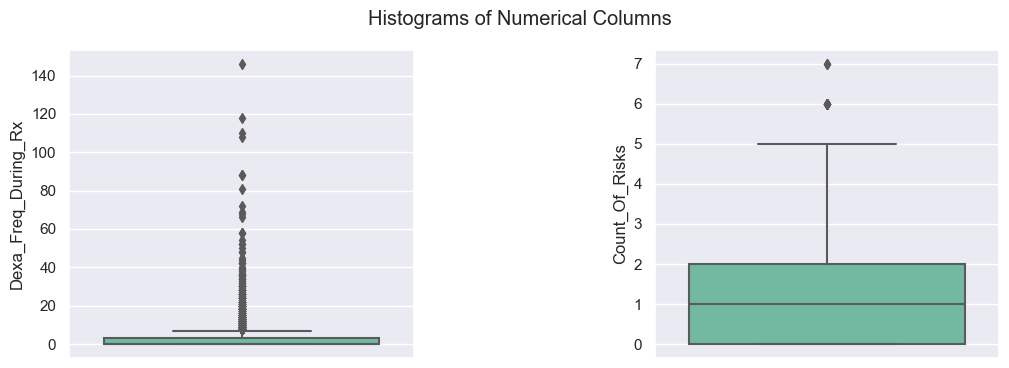

In [9]:
# Boxplot of Numerical Columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.7, hspace=0.3)
sns.set(style="darkgrid")
for i, ax in enumerate(axes.ravel()):
    if i > 2:
        ax.set_visible(False)
        continue
    sns.boxplot(data=df, y=df_num.columns[i],ax = ax, color = '#68c4a4')
fig.suptitle('Histograms of Numerical Columns')
plt.show()

In [10]:
# checking Categorical columns
for col in df_cat.columns:
    print(f'The column {col} has {df[col].nunique()} unique values: {df[col].unique()[:5]}')
    
# The Ptid has 3424 unique values. It is patients id, so we can remove this column for out analysis
df.drop('Ptid', axis = 1, inplace = True)
df_cat.drop('Ptid', axis = 1, inplace = True)

The column Ptid has 3424 unique values: ['P1' 'P2' 'P3' 'P4' 'P5']
The column Persistency_Flag has 2 unique values: ['Persistent' 'Non-Persistent']
The column Gender has 2 unique values: ['Male' 'Female']
The column Race has 4 unique values: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
The column Ethnicity has 3 unique values: ['Not Hispanic' 'Hispanic' 'Unknown']
The column Region has 5 unique values: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
The column Age_Bucket has 4 unique values: ['>75' '55-65' '65-75' '<55']
The column Ntm_Speciality has 36 unique values: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY']
The column Ntm_Specialist_Flag has 2 unique values: ['Others' 'Specialist']
The column Ntm_Speciality_Bucket has 3 unique values: ['OB/GYN/Others/PCP/Unknown' 'Endo/Onc/Uro' 'Rheum']
The column Gluco_Record_Prior_Ntm has 2 unique values: ['N' 'Y']
The column Gluco_Record_During_Rx has 2 unique values: ['N' 'Y']
The column Dexa

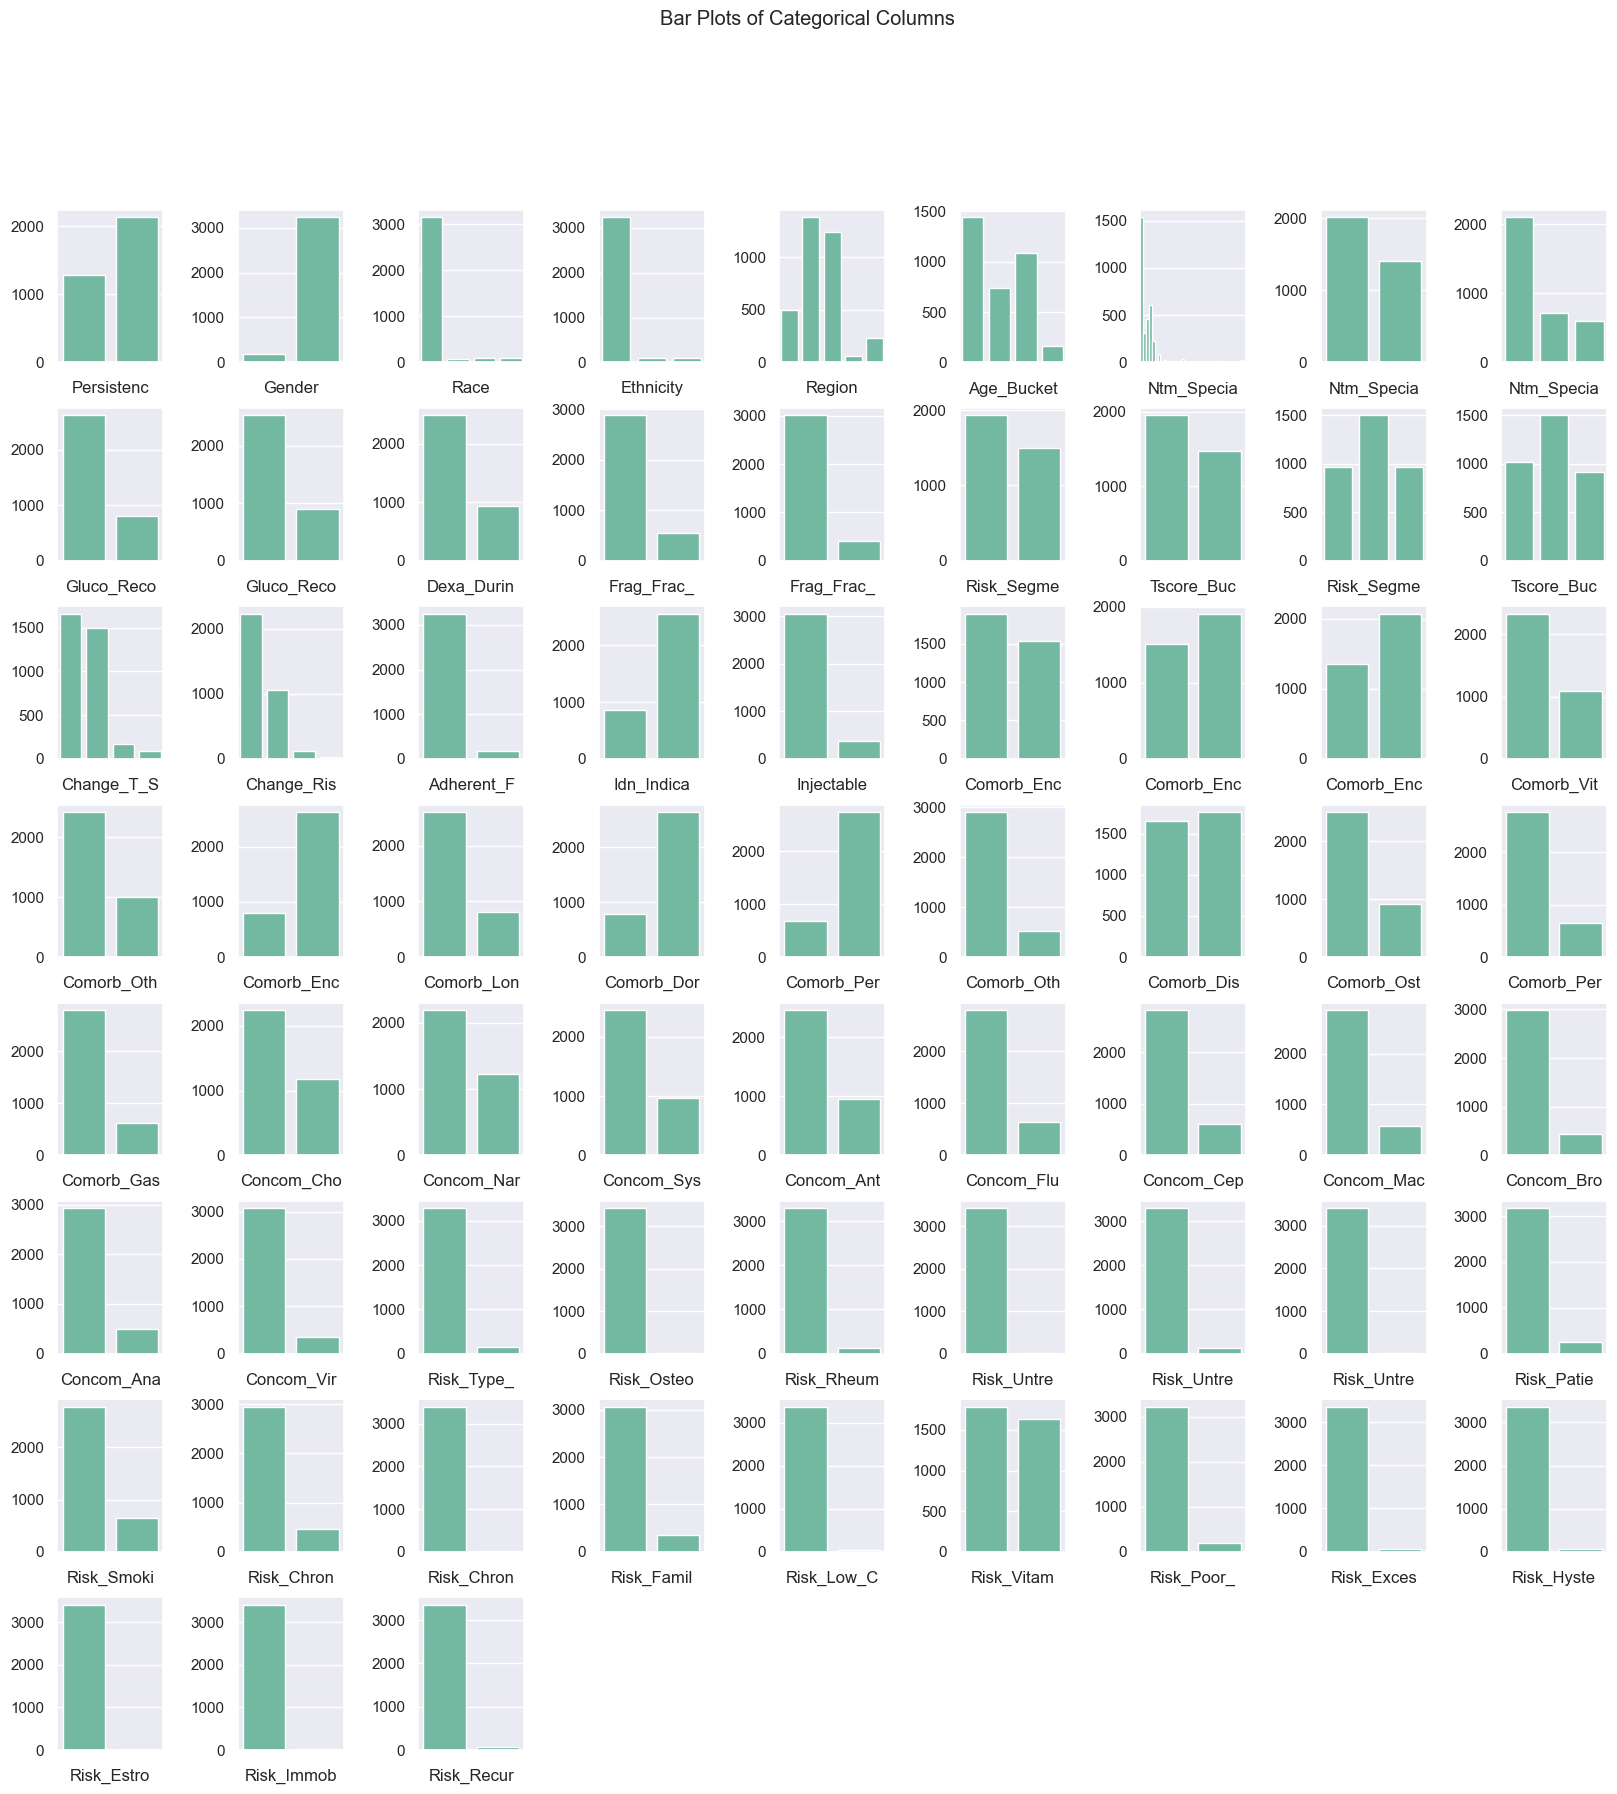

In [11]:
# Bar Plots of Categorical Columns
fig, axes = plt.subplots(8, 9, figsize=(20, 20))
plt.subplots_adjust(wspace=0.7, hspace=0.3)
sns.set(style="darkgrid")
for i, ax in enumerate(axes.ravel()):
    if i > 65:
        ax.set_visible(False)
        continue
    g = sns.countplot(data = df, x = df_cat.columns[i], ax=ax, color = '#68c4a4')
    g.set(xticklabels=[])
    g.set(ylabel = None)
    g.set(xlabel=df_cat.columns[i][:10])
fig.suptitle('Bar Plots of Categorical Columns')
plt.show()

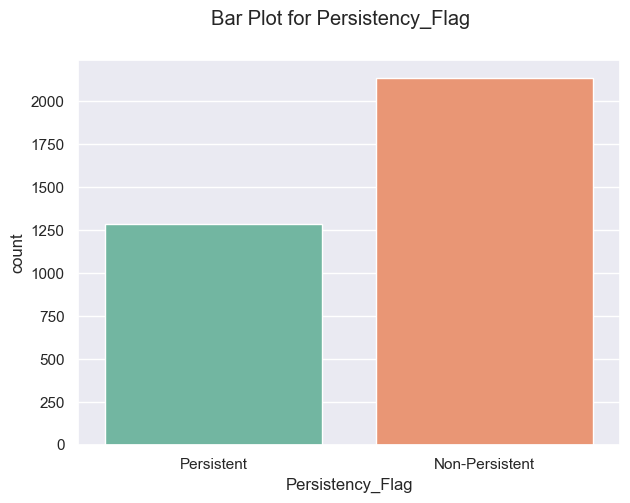

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64


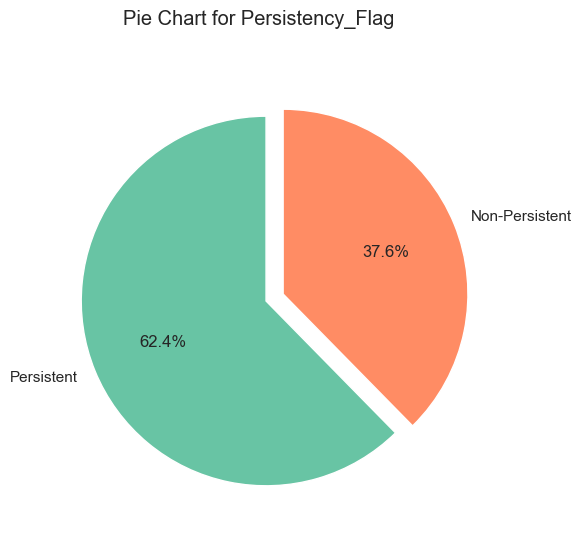

In [12]:
# Target Variable: Persistency_Flag = Imbalanced Data
plt.figure(figsize=(7, 5))
sns.countplot(data = df, x = 'Persistency_Flag', palette = 'Set2')
plt.suptitle('Bar Plot for Persistency_Flag')
plt.show()

print(df.Persistency_Flag.value_counts()) 
# Non-Persistent 62%
# Persistent 38%
# Considered Imbalanced

values = df.Persistency_Flag.value_counts()
plt.figure(figsize=(6,6))
plt.pie(values, explode = (0,0.1),autopct='%1.1f%%',labels=['Persistent','Non-Persistent'], shadow=False,startangle=90, colors=['#68c4a4','#ff8c64'])
plt.suptitle('Pie Chart for Persistency_Flag')
plt.show()

### 3) Explorative Data Analysis

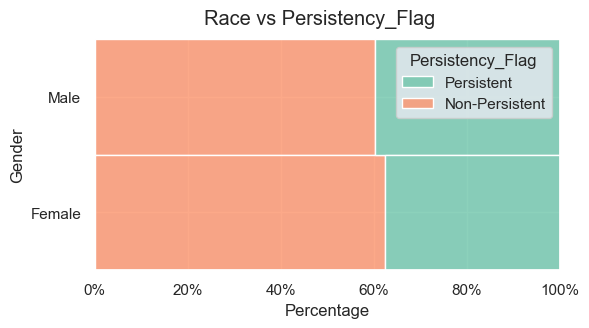

In [13]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(6,3))
ax = sns.histplot(y='Gender', hue='Persistency_Flag', multiple='fill', data=df, palette = 'Set2')
ax.xaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel('Percentage')
plt.suptitle('Race vs Persistency_Flag')
plt.show()

#colors=['#68c4a4','#ff8c64']

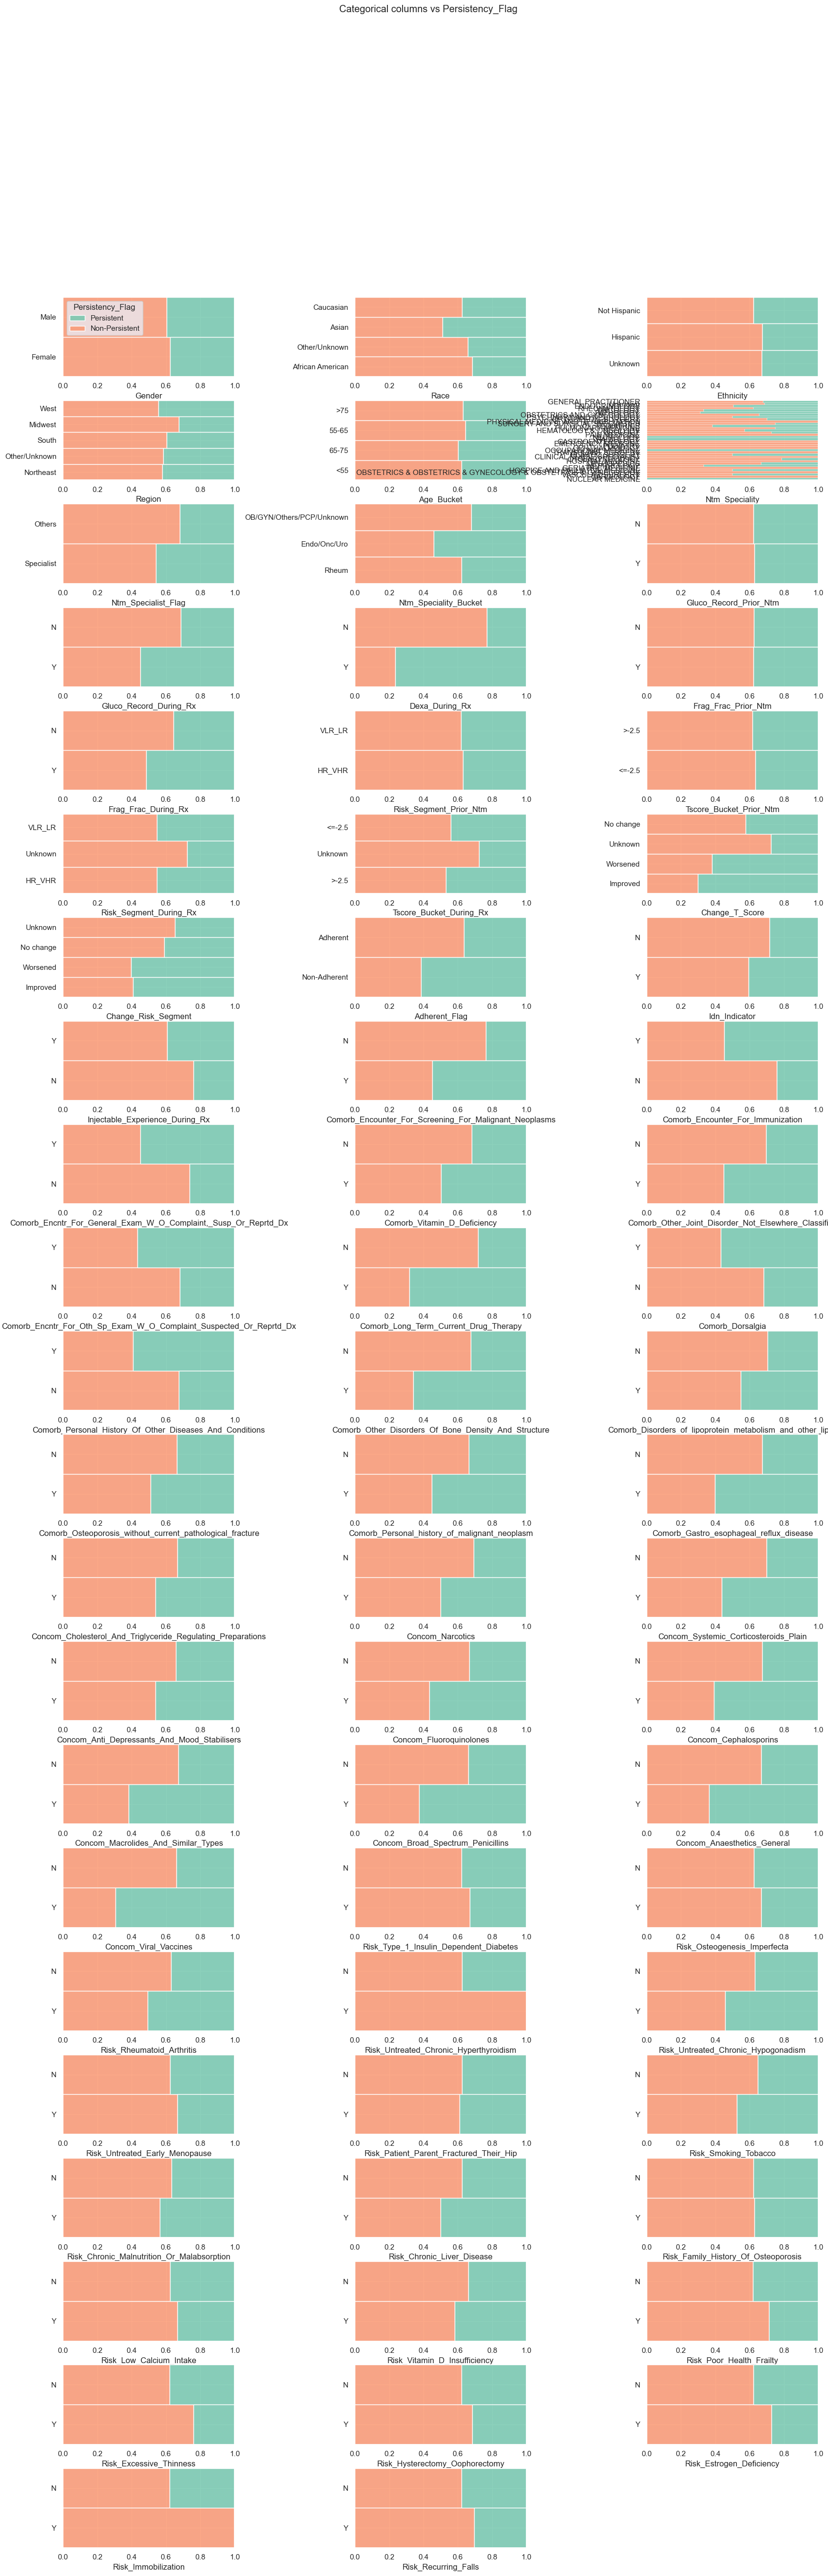

In [14]:
df_cat_1 = df_cat.drop('Persistency_Flag', axis = 1)
fig, axes = plt.subplots(22, 3, figsize=(20, 60))
plt.subplots_adjust(wspace=0.7, hspace=0.3)
sns.set(style="darkgrid")
for i, ax in enumerate(axes.ravel()):
    if i > 64:
        ax.set_visible(False)
        continue
    if i == 0:
        g = sns.histplot(y=df_cat_1.columns[i], hue='Persistency_Flag', multiple = 'fill', data = df, ax = ax, palette = 'Set2')
    else:    
        g = sns.histplot(y=df_cat_1.columns[i], hue='Persistency_Flag', multiple = 'fill', data = df, ax = ax, legend = False, palette = 'Set2')
    g.set(ylabel = None)
    g.set(xlabel=df_cat_1.columns[i])
fig.suptitle('Categorical columns vs Persistency_Flag')
plt.show()

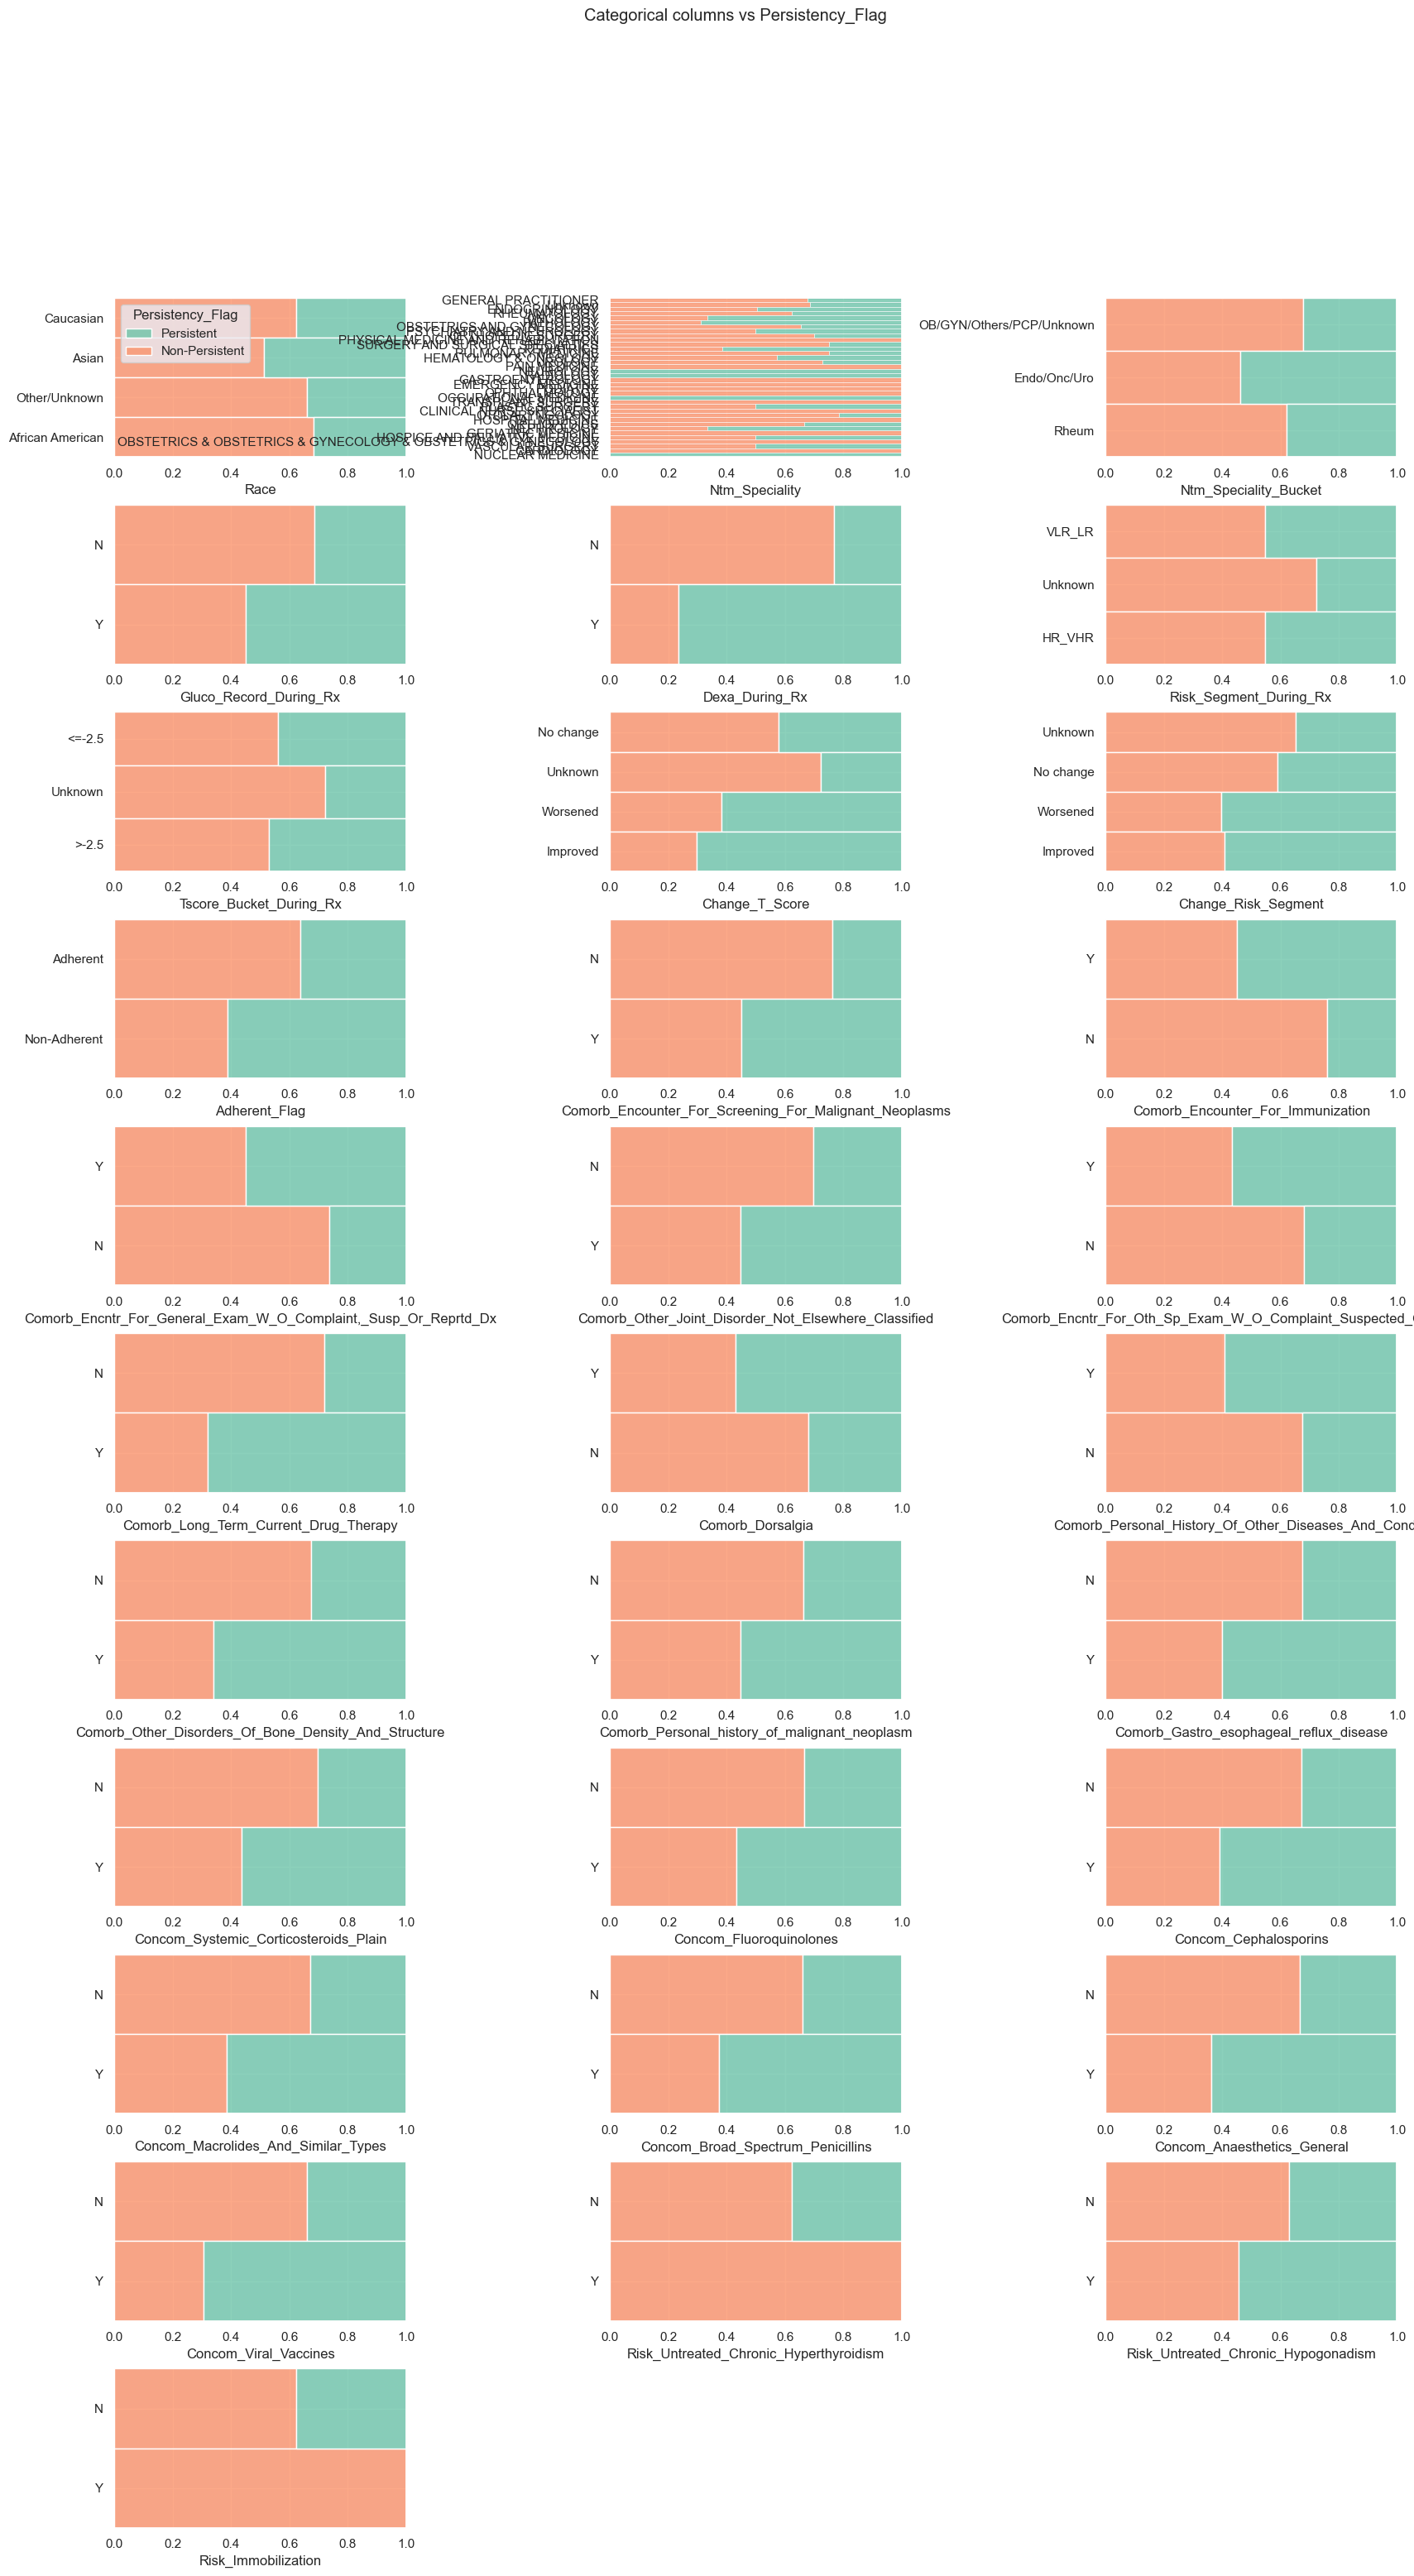

In [15]:
# Feature Engineer
# categorical columns that are more influential than others:
important_col = ['Race', 'Ntm_Speciality', 'Ntm_Speciality_Bucket',  'Gluco_Record_During_Rx',  
                 'Dexa_During_Rx', 'Risk_Segment_During_Rx' , 'Tscore_Bucket_During_Rx', 
                 'Change_T_Score',  'Change_Risk_Segment',  'Adherent_Flag',   
                 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',  
                 'Comorb_Encounter_For_Immunization',  'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 
                 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',  
                 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',  
                 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',  
                 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',  
                 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Personal_history_of_malignant_neoplasm',  
                 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Systemic_Corticosteroids_Plain',  
                 'Concom_Fluoroquinolones',  'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types',  
                 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',  'Concom_Viral_Vaccines', 
                 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism' ,  'Risk_Immobilization' ]


fig, axes = plt.subplots(11, 3, figsize=(20, 35))
plt.subplots_adjust(wspace=0.7, hspace=0.3)
sns.set(style="darkgrid")
for i, ax in enumerate(axes.ravel()):
    if i > 30:
        ax.set_visible(False)
        continue
    if i == 0:
        g = sns.histplot(y=important_col[i], hue='Persistency_Flag', multiple = 'fill', data = df, ax = ax, palette = 'Set2')
    else:    
        g = sns.histplot(y=important_col[i], hue='Persistency_Flag', multiple = 'fill', data = df, ax = ax, legend = False, palette = 'Set2')
    g.set(ylabel = None)
    g.set(xlabel=important_col[i])
fig.suptitle('Categorical columns vs Persistency_Flag')
plt.show()

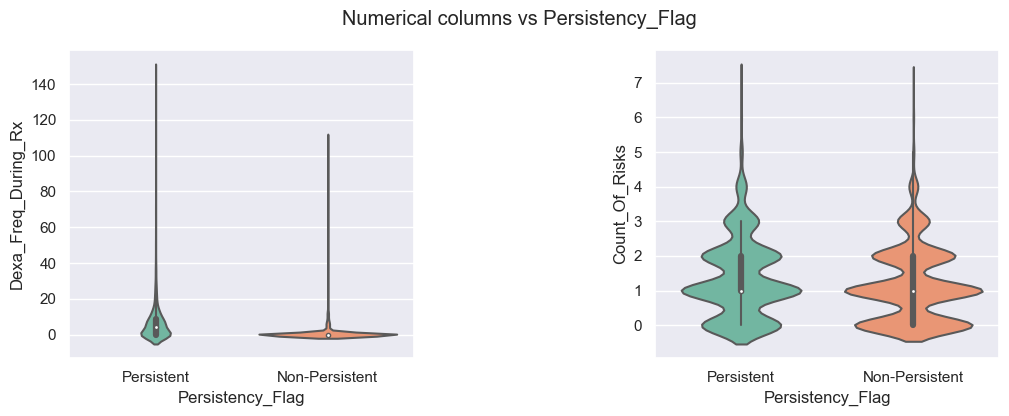

In [16]:
# Relationship between numerical variables and target variable

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.7, hspace=0.3)
sns.set(style="darkgrid")
for i, ax in enumerate(axes.ravel()):
    if i > 2:
        ax.set_visible(False)
        continue
    sns.violinplot(x='Persistency_Flag', y = df_num.columns[i], data = df, ax = ax, palette = 'Set2')
fig.suptitle('Numerical columns vs Persistency_Flag')
plt.show()

# We will not select 'Count_Of_Risks' column as our important feature since there's no significant difference between Peresistent and Non-Persistent values.

In [17]:
important_col.append(df_num.columns[0])
print(f'These are our selected features to build model: {important_col}')

These are our selected features to build model: ['Race', 'Ntm_Speciality', 'Ntm_Speciality_Bucket', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetic